In [1]:
!pip uninstall -y tensorflow

Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 43kB/s 


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_treinamento, Y_treinamento), (X_teste, Y_teste) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_treinamento.shape

(60000, 28, 28)

In [6]:
X_treinamento = X_treinamento / 255

In [7]:
X_treinamento = X_treinamento.reshape(-1, 28,28,1)

In [8]:
X_teste = X_teste / 255

In [9]:
X_teste = X_teste.reshape(-1, 28,28,1)

In [10]:
import numpy as np

Text(0.5, 1.0, 'Classe: 1')

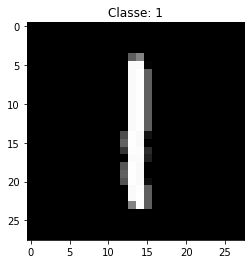

In [11]:
plt.imshow(X_treinamento[102].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(int(Y_treinamento[102])))

In [12]:
model = tf.keras.Sequential()

In [13]:
model.add( tf.keras.layers.Conv2D( filters = 32, kernel_size=[5,5], activation = 'relu', input_shape = (28,28,1) ) )

In [14]:
model.add( tf.keras.layers.MaxPooling2D( pool_size = (2,2), strides = 2 ) )

In [15]:
model.add( tf.keras.layers.Conv2D( filters = 64, kernel_size=[5,5], activation = 'relu' ) )

In [16]:
model.add( tf.keras.layers.MaxPooling2D( pool_size = (2,2), strides = 2 ) )

In [17]:
model.add( tf.keras.layers.Dropout( rate = 0.25 ) )

In [18]:
model.add( tf.keras.layers.Flatten( ) )

In [19]:
model.add( tf.keras.layers.Dense( units = 128, activation = 'relu' ) )

In [20]:
model.add( tf.keras.layers.Dropout( rate = 0.5 ) )

In [21]:
model.add( tf.keras.layers.Dense( units = 10, activation= 'softmax' ) )

In [22]:
model.compile(optimizer = 'adam'  , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [24]:
model.fit(X_treinamento, Y_treinamento, batch_size=128,  epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 56s 118ms/step - loss: 0.6310 - accuracy: 0.7948
Epoch 2/5
469/469 [==============================] - 56s 119ms/step - loss: 0.1042 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0646 - accuracy: 0.9808
Epoch 4/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 56s 118ms/step - loss: 0.0463 - accuracy: 0.9858


In [25]:
test_loss, test_acc = model.evaluate(X_teste, Y_teste)

313/313 [==============================] - 3s 10ms/step - loss: 0.0253 - accuracy: 0.9908


In [26]:
test_acc

0.9908000230789185

In [28]:
previsao = model.predict(X_teste) 

In [29]:
prev = np.argmax( previsao, axis=1 )

In [30]:
prev

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
from sklearn.metrics import accuracy_score

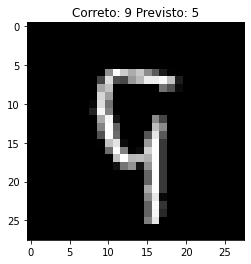

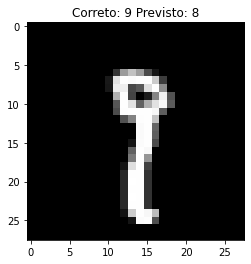

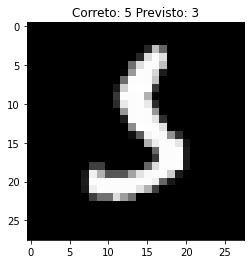

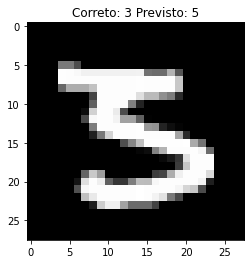

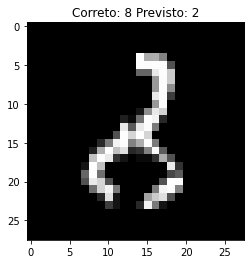

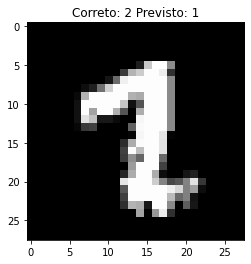

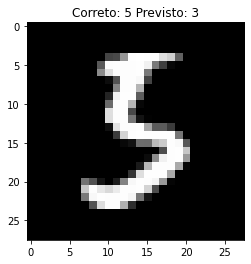

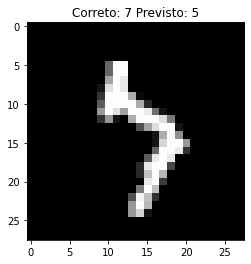

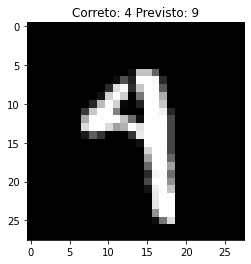

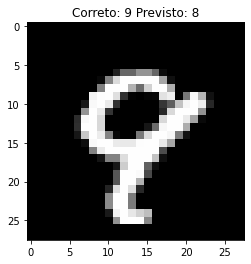

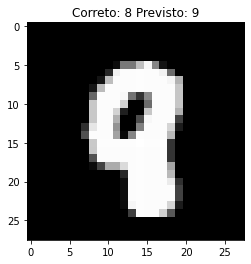

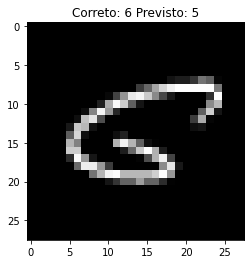

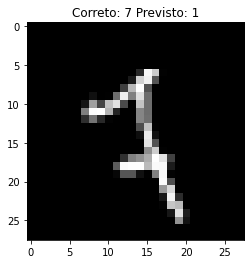

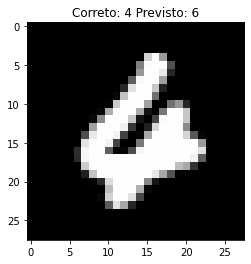

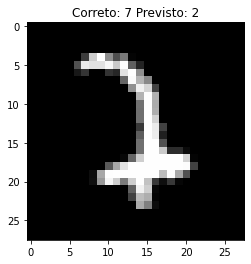

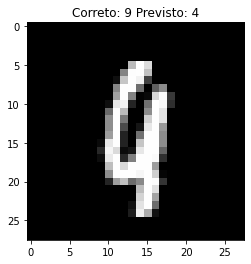

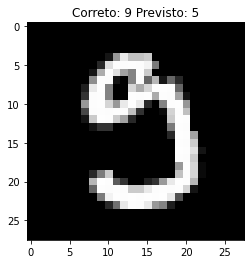

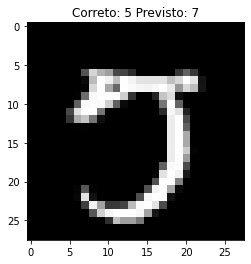

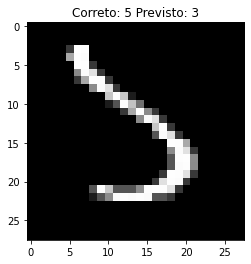

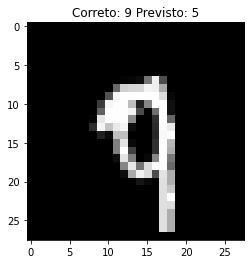

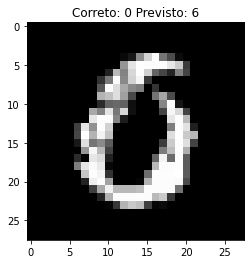

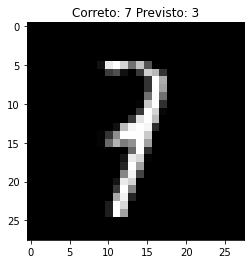

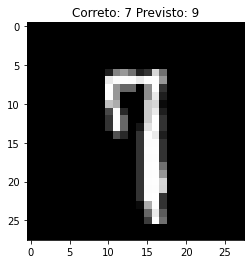

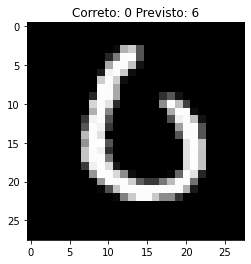

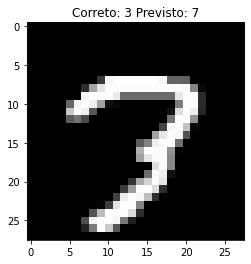

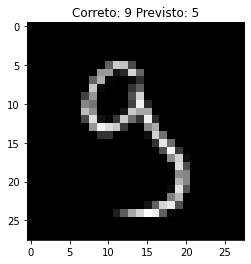

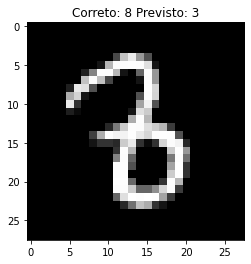

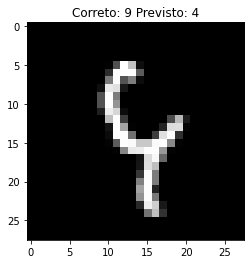

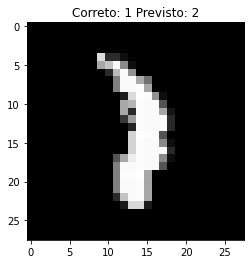

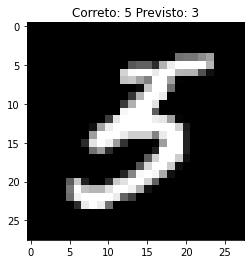

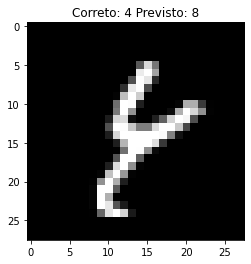

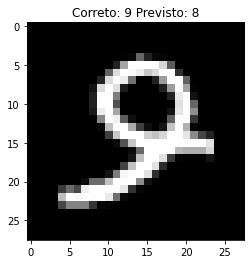

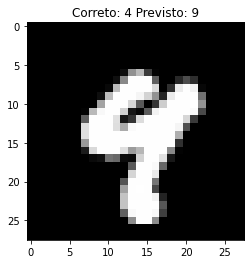

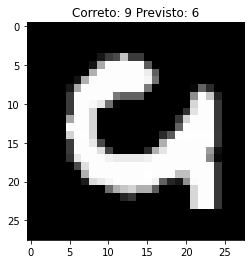

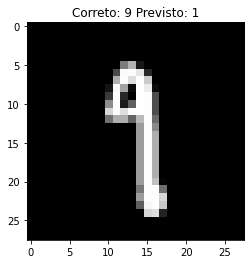

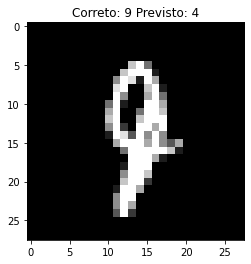

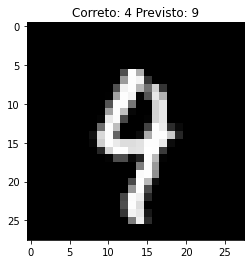

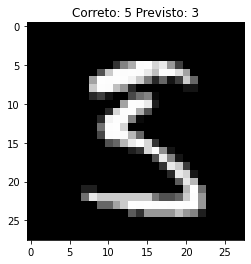

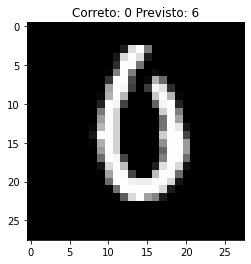

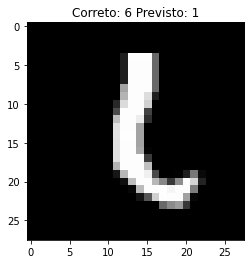

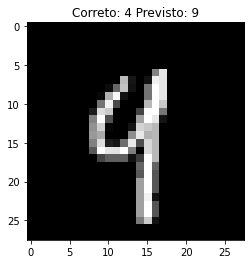

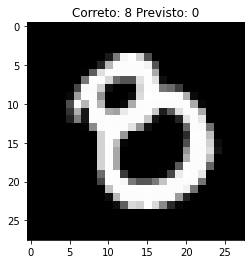

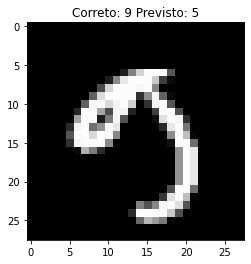

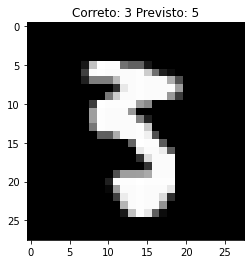

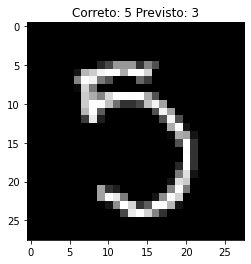

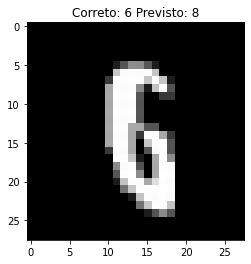

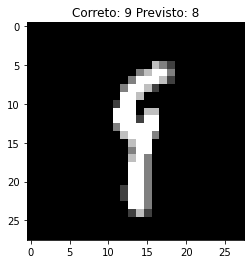

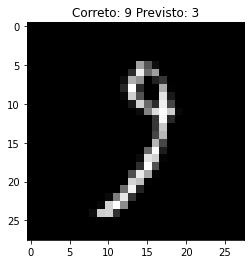

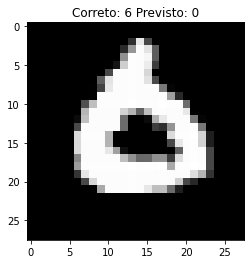

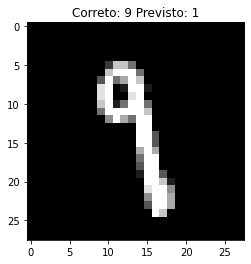

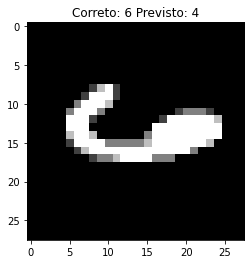

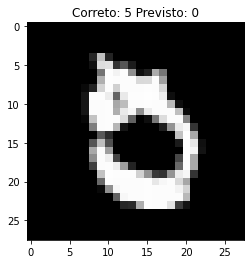

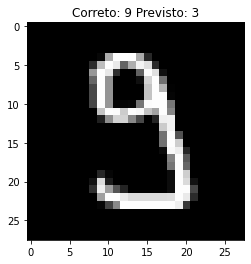

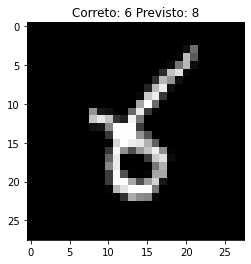

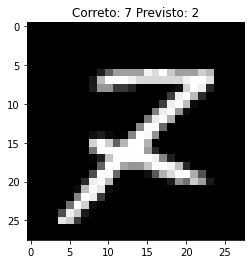

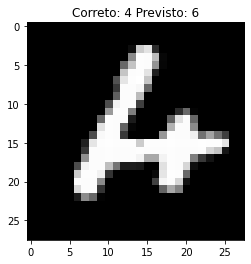

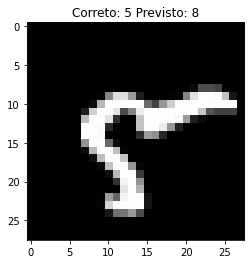

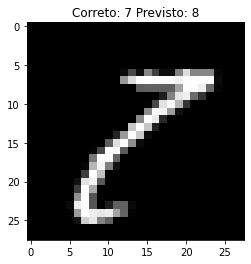

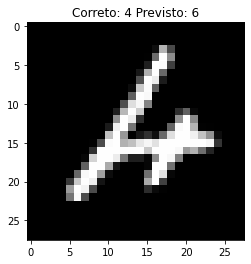

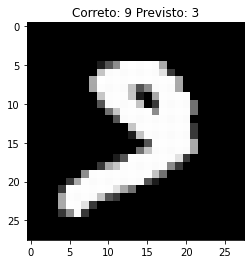

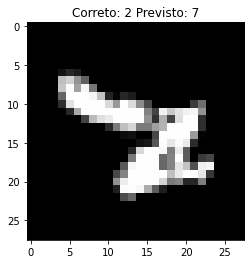

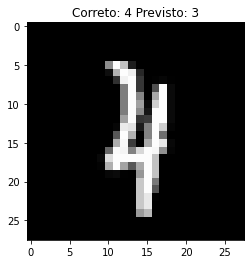

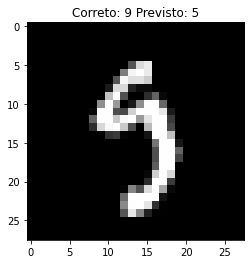

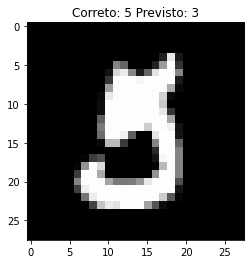

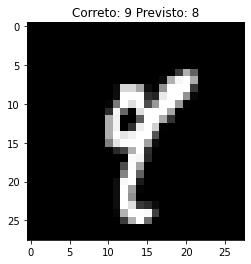

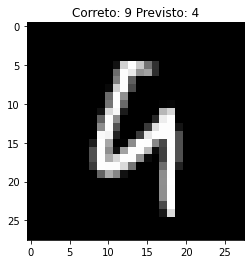

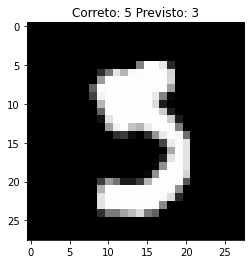

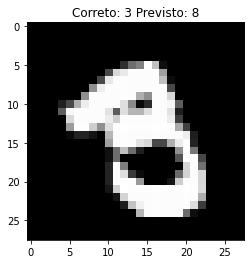

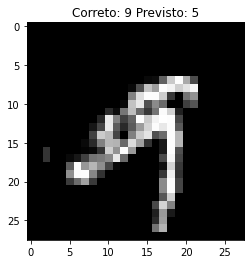

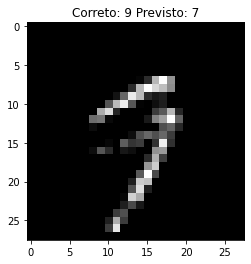

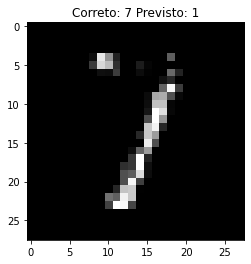

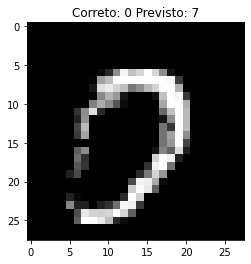

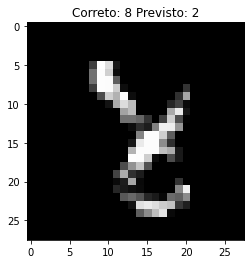

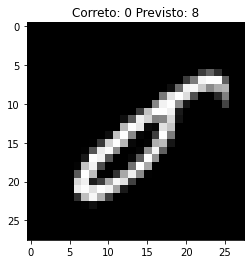

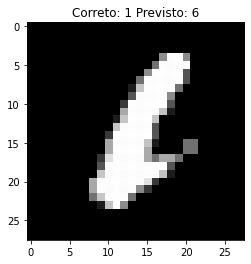

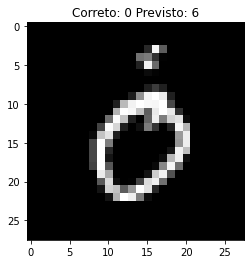

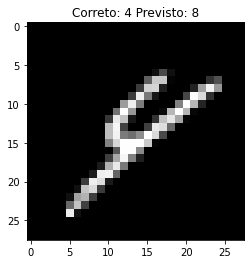

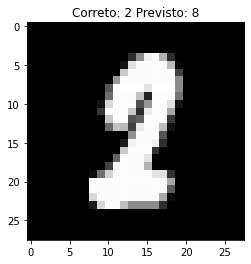

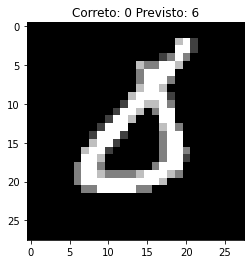

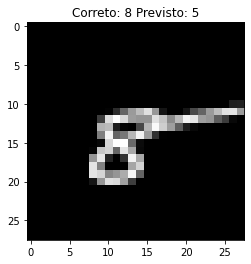

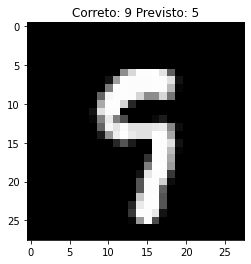

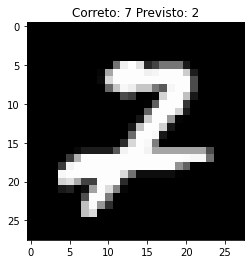

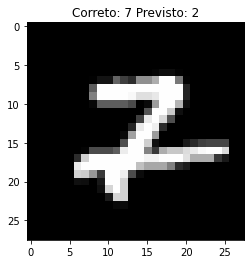

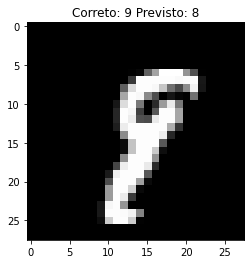

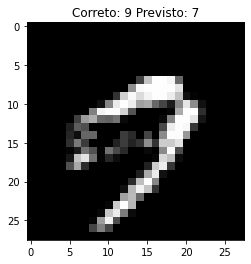

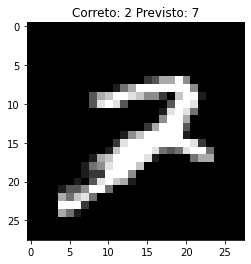

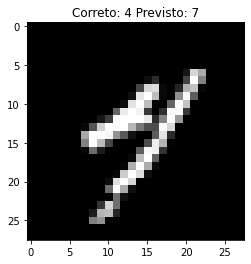

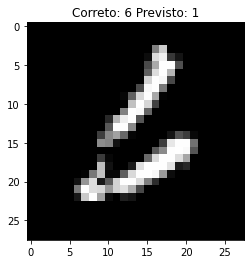

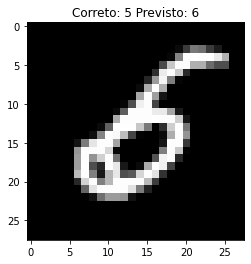

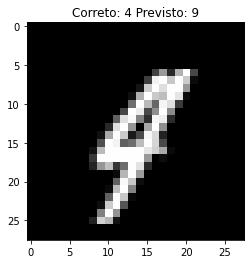

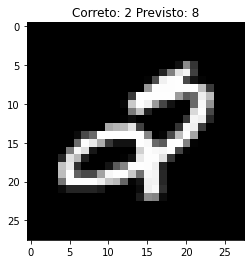

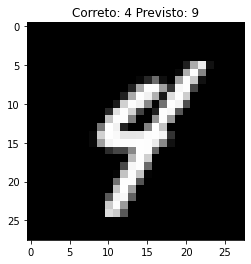

In [32]:
soma = 0
for i in range( len(Y_teste) ):
  if tf.not_equal(Y_teste[i], prev[i] ):
    plt.imshow(X_teste[i].reshape(28,28), cmap='gray')
    plt.title('Correto: ' + str(Y_teste[i]) + ' Previsto: ' + str(prev[i]) )
    plt.show()

In [33]:
acc = accuracy_score(Y_teste, prev)

In [34]:
acc

0.9908